# Encontrar cliques máximas em um grafo
--------

## Projeto Super computação

##### Aluno: Paulo Henrique Moreira Falcão

### Introdução

Esse notebook consiste no compilado de todo o projeto de supercomputação desenvolvido durante o semestre. Aqui se encontram os códigos fontes, explicações e resultados obtidos no projeto. O repositório em que o projeto foi desenvolvido está disponível [nesse repositório](https://github.com/Paulofalcao2002/projetoSuperComp) no Github.

### Encontrar a clique máxima em um grafo

![Exemplo Clique](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/1200px-VR_complex.svg.png)

A problemática que motivou o projeto foi a de resolver um problema da classe dos **NP hard**, encontrar a clique máxima em grafo. Uma clique é um subconjunto de vértices de um grafo, onde todos os vértices pertencentes a clique estão conectados entre si. A solução mais ingênua para esse problema envolve testar todas as combinações possíveis de vértices em busca de uma clique máxima.

Por ser um problema combinatório, encontrar a clique máxima para um grafo com um total de vértices de 50, por exemplo, demora um tempo considerável dependendo da forma como o algoritmo foi implementado. Em busca de acelerar essa computação serão feitas implementações paralelas e de computação distribuída, buscando diminuir o tempo em que a parte paralelizável do código executa.

Por fim, foram implementadas duas abordagens heurísticas que procuram encontrar soluções "razoáveis" e não necessariamente a solução ótima, em favor de um tempo de execução menor.




## Implementações sequenciais

-------------

### Primeira implementação

A implementação mais simples, seria testar todas as possibilidades para achar a maior clique que existe:

In [26]:
%%writefile forca-bruta-ingenua.cpp

#include <algorithm>
#include <fstream>
#include <iostream>
#include <vector>
#include <chrono>
using namespace std;
using namespace chrono;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> lerGrafo(const string &nomeArquivo, int &numVertices) {
  ifstream arquivo(nomeArquivo);
  int numArestas;
  arquivo >> numVertices >> numArestas;

  vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

  for (int i = 0; i < numArestas; ++i) {
    int u, v;
    arquivo >> u >> v;
    grafo[u - 1][v - 1] = 1;
    grafo[v - 1][u - 1] = 1; // O grafo é não direcionado
  }

  arquivo.close();

  return grafo;
}

// Função para verificar se um conjunto de vértices forma uma clique
bool formaClique(const vector<vector<int>> &grafo,
                 const vector<int> &vertices) {
  for (int i = 0; i < (int)vertices.size(); ++i) {
    for (int j = i + 1; j < (int)vertices.size(); ++j) {
      if (grafo[vertices[i]][vertices[j]] == 0) {
        return false;
      }
    }
  }
  return true;
}

// Função recursiva para encontrar a clique máxima
void encontrarCliqueMaximaRec(const vector<vector<int>> &grafo,
                              vector<int> &cliqueAtual,
                              vector<int> &melhorClique, int verticeAtual) {
  if (verticeAtual == (int)grafo.size()) {
    if (cliqueAtual.size() > melhorClique.size() &&
        formaClique(grafo, cliqueAtual)) {
      melhorClique = cliqueAtual;
    }
    return;
  }

  // Tente incluir o vértice atual na clique
  cliqueAtual.push_back(verticeAtual);
  encontrarCliqueMaximaRec(grafo, cliqueAtual, melhorClique, verticeAtual + 1);
  cliqueAtual.pop_back(); // Desfaça a inclusão

  // Tente não incluir o vértice atual na clique
  encontrarCliqueMaximaRec(grafo, cliqueAtual, melhorClique, verticeAtual + 1);
}

// Função principal para encontrar a clique máxima
vector<int> encontrarCliqueMaxima(const vector<vector<int>> &grafo) {
  vector<int> cliqueAtual;
  vector<int> melhorClique;

  encontrarCliqueMaximaRec(grafo, cliqueAtual, melhorClique, 0);

  return melhorClique;
}

int main() {
  int numVertices;
  vector<vector<int>> grafo = lerGrafo("grafo.txt", numVertices);

  auto start = high_resolution_clock::now();

  vector<int> cliqueMaxima = encontrarCliqueMaxima(grafo);

  auto stop = high_resolution_clock::now();
  auto duration = duration_cast<milliseconds>(stop - start);

  cout << "Execution time: " << duration.count() << " milliseconds" << endl;

  cout << "Clique máxima: ";
  for (auto vertice : cliqueMaxima) {
    cout << vertice + 1 << " ";
  }
  cout << endl;
  cout << "Tamanho clique máxima: " << cliqueMaxima.size() << endl;

  return 0;
}

Overwriting forca-bruta-ingenua.cpp


Para testar esse código, existe o seguinte código python que gera um grafo e busca por uma clique máxima nele:

In [27]:
import networkx as nx
import random

def gera_grafo(num_vertices):

    # Parâmetros
    probabilidade_conexao = 0.7  # Probabilidade de haver uma aresta entre dois vértices (ajuste conforme necessário)

    # Crie um grafo aleatório densamente conectado
    grafo = nx.fast_gnp_random_graph(num_vertices, probabilidade_conexao)

    # Nome do arquivo de saída
    nome_arquivo = "grafo.txt"

    # Abra o arquivo para escrita
    with open(nome_arquivo, "w") as arquivo:
        # Escreva a quantidade de vértices e número de arestas na primeira linha
        arquivo.write(f"{num_vertices} {grafo.number_of_edges()}\n")

        # Escreva as arestas no formato de lista de adjacência
        for aresta in grafo.edges():
            arquivo.write(
                f"{aresta[0]+1} {aresta[1]+1}\n"
            )  # +1 para ajustar os índices (começando em 1)

    print(f"Grafo densamente conectado gerado e salvo em '{nome_arquivo}'.")


def acha_clique_maxima():
    # Nome do arquivo de entrada
    nome_arquivo = "grafo.txt"

    # Abrir o arquivo e pular a primeira linha
    with open(nome_arquivo, 'r') as arquivo:
        next(arquivo)  # Pula a primeira linha

        # Lê o grafo a partir das linhas restantes
        G = nx.parse_adjlist(arquivo)

    # Encontrar todas as cliques maximais
    cliques_maximais = list(nx.find_cliques(G))

    # Encontrar a clique máxima (a maior)
    clique_maxima = max(cliques_maximais, key=len)

    print("Clique máxima encontrada:", sorted(clique_maxima, reverse=True, key=lambda x: int(x)))
    print("Tamanho", len(clique_maxima))

In [28]:
gera_grafo(30)
acha_clique_maxima()

Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Clique máxima encontrada: ['29', '25', '13', '9', '7', '6', '2', '1']
Tamanho 8


In [29]:
%%shell
g++ -Wall -O3 -o forca-bruta-ingenua forca-bruta-ingenua.cpp
./forca-bruta-ingenua

Execution time: 14776 milliseconds
Clique máxima: 1 2 6 7 9 13 25 29 
Tamanho clique máxima: 8


### Segunda implementação


Pelo fato da implementação acima testar todos os vértices sem critério nenhum, a execução para grafos maiores é muito lenta. Dessa forma, a próxima implementação utiliza uma lista de **candidatos**. Assim, apenas vamos criar cliques que realmente formam cliques, em busca da clique máxima.

In [30]:
%%writefile forca-bruta-recursiva.cpp
#include <algorithm>
#include <chrono>
#include <fstream>
#include <iostream>
#include <vector>
using namespace std;
using namespace chrono;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> lerGrafo(const string &nomeArquivo, int &numVertices) {
  ifstream arquivo(nomeArquivo);
  int numArestas;
  arquivo >> numVertices >> numArestas;

  vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

  for (int i = 0; i < numArestas; ++i) {
    int u, v;
    arquivo >> u >> v;
    grafo[u - 1][v - 1] = 1;
    grafo[v - 1][u - 1] = 1; // O grafo é não direcionado
  }

  arquivo.close();

  return grafo;
}

// Função recursiva para encontrar a clique máxima
vector<int> encontrarCliqueMaximaRec(const vector<vector<int>> &grafo,
                                     int verticeAtual,
                                     vector<int> &candidatos) {

  // Define uma clique máxima para o candidato, que inicialmente tem o valor do candidato
  vector<int> cliqueMaximaCandidato;
  cliqueMaximaCandidato.push_back(verticeAtual);

  // Define um vetor de novos candidatos
  vector<int> novosCandidatos;

  // Busca novos candidatos que são adjacentes a todos os membros
  // da clique do candidato
  for (auto u : candidatos) {
    bool adjacenteATodos = true;

    for (auto c : cliqueMaximaCandidato) {
      if (grafo[u][c] == 0) {
        adjacenteATodos = false;
        break;
      }
    }

    if (adjacenteATodos) {
      novosCandidatos.push_back(u);
    }
  }

  // Para cada candidato que parte de do vértice atual
  for (auto novoCandidato : novosCandidatos) {
    // Chama recursivamente a função. O retorno da chamada é a maior clique para aquele novo candidato
    vector<int> cliqueNovoCandidato =
        encontrarCliqueMaximaRec(grafo, novoCandidato, novosCandidatos);

    // Verifica se o vértice atual está na clique do novo candidato
    bool podeAdicionar = true;
    for (auto u : cliqueNovoCandidato) {
      // Se não está ligado a alguém da clique máxima
      // não pode adicionar
      if (grafo[u][verticeAtual] == 0) {
        podeAdicionar = false;
        break;
      }
    }

    // Se podemos adicionar o vértice atual, e essa clique é maior do que a maior clique que contém o
    // vértice atual, atualizamos o valor clique máxima do vértice atual
    if (podeAdicionar &&
        cliqueNovoCandidato.size() + 1 > cliqueMaximaCandidato.size()) {
      cliqueNovoCandidato.push_back(verticeAtual);
      cliqueMaximaCandidato = cliqueNovoCandidato;
    }
  }

  // Retorna a maior clique para aquele candidato
  return cliqueMaximaCandidato;
}

// Função principal para encontrar a clique máxima
vector<int> encontrarCliqueMaxima(const vector<vector<int>> &grafo,
                                  int numVertices) {
  // Inicializa vetor pra clique atual, maior clique e primeiro vetor de candidatos
  vector<int> cliqueAtual;
  vector<int> melhorClique;
  vector<int> candidatos;

  // Preenche o primeiro vetor de candidatos, inicialmente todos os vértices são candidatos
  for (int i = 0; i < numVertices; i++) {
    candidatos.push_back(i);
  }

  // Acha a maior clique para cada candidato, e se for maior do que a maior clique,
  // atualiza o valor da maior clique
  for (auto candidato : candidatos) {
    cliqueAtual = encontrarCliqueMaximaRec(grafo, candidato, candidatos);
    if (cliqueAtual.size() > melhorClique.size()) {
      melhorClique = cliqueAtual;
    }
  }

  // Retorna a maior clique
  return melhorClique;
}

int main() {
  // Lê grafo
  int numVertices;
  vector<vector<int>> grafo = lerGrafo("grafo.txt", numVertices);

  // Mede tempo inicial
  auto start = high_resolution_clock::now();

  // Executa a função de achar maior clique
  vector<int> cliqueMaxima = encontrarCliqueMaxima(grafo, numVertices);

  // Retém o tempo final
  auto stop = high_resolution_clock::now();
  auto duration = duration_cast<milliseconds>(stop - start);

  // Mostra o tempo final
  cout << "Execution time: " << duration.count() << " milliseconds" << endl;

  // Mostra qual é a clique máxima encontrada
  cout << "Clique máxima: ";
  for (auto vertice : cliqueMaxima) {
    cout << vertice + 1 << " ";
  }
  cout << endl;
  cout << "Tamanho clique máxima: " << cliqueMaxima.size() << endl;

  return 0;
}


Overwriting forca-bruta-recursiva.cpp


In [31]:
%%shell
g++ -Wall -O3 -o forca-bruta-recursiva forca-bruta-recursiva.cpp
./forca-bruta-recursiva

Execution time: 178 milliseconds
Clique máxima: 29 25 13 9 7 6 2 1 
Tamanho clique máxima: 8


Muito mais rápido do que a primeira implementação!

### Terceira implementação


A implementação acima ainda pode ser melhorada, através do uso de **memoização**. Acontece que muitos dos cálculos da chamada recursiva podem ser repetidos, o que faz com que o algoritmo perca tempo refazendo as mesmas cliques. Para lidar com isso, podemos salvar resultados intermediários em um mapa, e na chamada recursiva verificar se aquela clique já foi calculada.

In [32]:
%%writefile forca-bruta-memoizado.cpp
#include <algorithm>
#include <chrono>
#include <fstream>
#include <iostream>
#include <vector>
using namespace std;
using namespace chrono;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> lerGrafo(const string &nomeArquivo, int &numVertices) {
  ifstream arquivo(nomeArquivo);
  int numArestas;
  arquivo >> numVertices >> numArestas;

  vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

  for (int i = 0; i < numArestas; ++i) {
    int u, v;
    arquivo >> u >> v;
    grafo[u - 1][v - 1] = 1;
    grafo[v - 1][u - 1] = 1; // O grafo é não direcionado
  }

  arquivo.close();

  return grafo;
}

// Função recursiva para encontrar a clique máxima
vector<int> encontrarCliqueMaximaRec(const vector<vector<int>> &grafo,
                                     int verticeAtual, vector<int> &candidatos,
                                     unordered_map<string, vector<int>> &memo) {

  // Gera uma chave para combinação de candidatos e vértice atual
  string key = to_string(verticeAtual);
  for (int candidate : candidatos) {
    key += "_" + to_string(candidate);
  }

  // Verifica se a chave está no mapa memoizado
  if (memo.find(key) != memo.end()) {
    return memo[key];
  }

  // Define uma clique máxima para o candidato, que inicialmente tem o valor do candidato
  vector<int> cliqueMaximaCandidato;
  cliqueMaximaCandidato.push_back(verticeAtual);

  // Define um vetor de novos candidatos
  vector<int> novosCandidatos;

  // Busca novos candidatos que são adjacentes a todos os membros
  // da clique do candidato
  for (auto u : candidatos) {
    bool adjacenteATodos = true;

    for (auto c : cliqueMaximaCandidato) {
      if (grafo[u][c] == 0) {
        adjacenteATodos = false;
        break;
      }
    }

    if (adjacenteATodos) {
      novosCandidatos.push_back(u);
    }
  }

  // Para cada candidato que parte de do vértice atual
  for (auto novoCandidato : novosCandidatos) {
    // Chama recursivamente a função. O retorno da chamada é a maior clique para aquele novo candidato
    vector<int> cliqueNovoCandidato =
        encontrarCliqueMaximaRec(grafo, novoCandidato, novosCandidatos, memo);

    // Verifica se o vértice atual está na clique do novo candidato
    bool podeAdicionar = true;
    for (auto u : cliqueNovoCandidato) {
      // Se não está ligado a alguém da clique máxima
      // não pode adicionar
      if (grafo[u][verticeAtual] == 0) {
        podeAdicionar = false;
        break;
      }
    }

    // Se podemos adicionar o vértice atual, e essa clique é maior do que a maior clique que contém o
    // vértice atual, atualizamos o valor clique máxima do vértice atual
    if (podeAdicionar &&
        cliqueNovoCandidato.size() + 1 > cliqueMaximaCandidato.size()) {
      cliqueNovoCandidato.push_back(verticeAtual);
      cliqueMaximaCandidato = cliqueNovoCandidato;
    }
  }

  // Adiciona a clique calculada na memoização
  memo[key] = cliqueMaximaCandidato;

  // Retorna a maior clique para aquele candidato
  return cliqueMaximaCandidato;
}

// Função principal para encontrar a clique máxima
vector<int> encontrarCliqueMaxima(const vector<vector<int>> &grafo,
                                  int numVertices) {
  // Inicializa vetor pra clique atual, maior clique e primeiro vetor de candidatos
  vector<int> cliqueAtual;
  vector<int> melhorClique;
  vector<int> candidatos;
  unordered_map<string, vector<int>> memo; // Usa um mapa para memoização
  memo.clear();

  // Preenche o primeiro vetor de candidatos, inicialmente todos os vértices são candidatos
  for (int i = 0; i < numVertices; i++) {
    candidatos.push_back(i);
  }

  // Acha a maior clique para cada candidato, e se for maior do que a maior clique,
  // atualiza o valor da maior clique
  for (auto candidato : candidatos) {
    cliqueAtual = encontrarCliqueMaximaRec(grafo, candidato, candidatos, memo);
    if (cliqueAtual.size() > melhorClique.size()) {
      melhorClique = cliqueAtual;
    }
  }

  return melhorClique;
}

int main() {
  // Lê grafo
  int numVertices;
  vector<vector<int>> grafo = lerGrafo("grafo.txt", numVertices);

  // Mede tempo inicial
  auto start = high_resolution_clock::now();

  // Executa a função de achar maior clique
  vector<int> cliqueMaxima = encontrarCliqueMaxima(grafo, numVertices);

  // Retém o tempo final
  auto stop = high_resolution_clock::now();
  auto duration = duration_cast<milliseconds>(stop - start);

  // Mostra o tempo final
  cout << "Execution time: " << duration.count() << " milliseconds" << endl;

  // Mostra qual é a clique máxima encontrada
  cout << "Clique máxima: ";
  for (auto vertice : cliqueMaxima) {
    cout << vertice + 1 << " ";
  }
  cout << endl;
  cout << "Tamanho clique máxima: " << cliqueMaxima.size() << endl;

  return 0;
}


Overwriting forca-bruta-memoizado.cpp


In [33]:
%%shell
g++ -Wall -O3 -o forca-bruta-memoizado forca-bruta-memoizado.cpp
./forca-bruta-memoizado

Execution time: 39 milliseconds
Clique máxima: 29 25 13 9 7 6 2 1 
Tamanho clique máxima: 8


### É possível implementar alguma poda? Algum critério que evite calcular um nó, dado que você já descobriu uma clique maior?

Seria possível limitarmos de acordo com a quantidade de candidatos + tamanho da clique. Ou seja, se nossa clique atual + tamanho de candidatos a serem analisados é menor do que a clique máxima, essa clique nunca será maior do que a clique máxima, sendo esse um ponto onde podemos podar a busca.

## Implementações paralelas com Open MP
------

Para adicionar Open MP nas nossas implementações, precisamos analisar o ponto onde são feitas o maior número de operações no código, sendo esse local o que mais se beneficiaria de paralelização através de threads.

Através do uso de ferramentas como profilers, podemos ver que um dos pontos críticos é quando chamamos a função `encontrarCliqueMaximaRec`, no `for` para todos os candidatos. Esse ponto seria ótimo para utilizar threads, já que não existe nenhum tipo de dependência entre as informações do for, e é um local onde ocorrem operações demoradas.


### Segunda implementação paralelisada

In [34]:
%%writefile forca-bruta-recursiva-paralela.cpp
#include <algorithm>
#include <chrono>
#include <fstream>
#include <iostream>
#include <vector>
#include <omp.h>
using namespace std;
using namespace chrono;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> lerGrafo(const string &nomeArquivo, int &numVertices) {
  ifstream arquivo(nomeArquivo);
  int numArestas;
  arquivo >> numVertices >> numArestas;

  vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

  for (int i = 0; i < numArestas; ++i) {
    int u, v;
    arquivo >> u >> v;
    grafo[u - 1][v - 1] = 1;
    grafo[v - 1][u - 1] = 1; // O grafo é não direcionado
  }

  arquivo.close();

  return grafo;
}

// Função recursiva para encontrar a clique máxima
vector<int> encontrarCliqueMaximaRec(const vector<vector<int>> &grafo,
                                     int verticeAtual,
                                     vector<int> &candidatos) {

 // Define uma clique máxima para o candidato, que inicialmente tem o valor do candidato
  vector<int> cliqueMaximaCandidato;
  cliqueMaximaCandidato.push_back(verticeAtual);

  // Define um vetor de novos candidatos
  vector<int> novosCandidatos;

  // Busca novos candidatos que são adjacentes a todos os membros
  // da clique do candidato
  for (auto u : candidatos) {
    bool adjacenteATodos = true;

    for (auto c : cliqueMaximaCandidato) {
      if (grafo[u][c] == 0) {
        adjacenteATodos = false;
        break;
      }
    }

    if (adjacenteATodos) {
      novosCandidatos.push_back(u);
    }
  }

  // Para cada candidato que parte de do vértice atual
  for (auto novoCandidato : novosCandidatos) {
    // Chama recursivamente a função. O retorno da chamada é a maior clique para aquele novo candidato
    vector<int> cliqueNovoCandidato =
        encontrarCliqueMaximaRec(grafo, novoCandidato, novosCandidatos);

    // Verifica se o vértice atual está na clique do novo candidato
    bool podeAdicionar = true;
    for (auto u : cliqueNovoCandidato) {
      // Se não está ligado a alguém da clique máxima
      // não pode adicionar
      if (grafo[u][verticeAtual] == 0) {
        podeAdicionar = false;
        break;
      }
    }

    // Se podemos adicionar o vértice atual, e essa clique é maior do que a maior clique que contém o
    // vértice atual, atualizamos o valor clique máxima do vértice atual
    if (podeAdicionar &&
        cliqueNovoCandidato.size() + 1 > cliqueMaximaCandidato.size()) {
      cliqueNovoCandidato.push_back(verticeAtual);
      cliqueMaximaCandidato = cliqueNovoCandidato;
    }
  }

  // Retorna a maior clique para aquele candidato
  return cliqueMaximaCandidato;
}

// Função principal para encontrar a clique máxima
vector<int> encontrarCliqueMaxima(const vector<vector<int>> &grafo,
                                  int numVertices) {
  // Inicializa vetor pra clique atual, maior clique e primeiro vetor de candidatos
  vector<int> cliqueAtual;
  vector<int> melhorClique;
  vector<int> candidatos(numVertices);

  // Preenche o primeiro vetor de candidatos, inicialmente todos os vértices são candidatos
  for (int i = 0; i < numVertices; i++) {
    candidatos[i] = i;
  }

  // Acha a maior clique para cada candidato, e se for maior do que a maior clique,
  // atualiza o valor da maior clique
  // Usa omp para calcular cliques em threads separadas
  #pragma omp parallel for
  for (auto candidato : candidatos) {
    cliqueAtual = encontrarCliqueMaximaRec(grafo, candidato, candidatos);

    if (cliqueAtual.size() > melhorClique.size()) {
      melhorClique = cliqueAtual;
    }
  }

  // Retorna a maior clique
  return melhorClique;
}

int main() {
  // Lê grafo
  int numVertices;
  vector<vector<int>> grafo = lerGrafo("grafo.txt", numVertices);

  // Executa a função de achar maior clique
  auto start = high_resolution_clock::now();

  // Executa a função de achar maior clique
  vector<int> cliqueMaxima = encontrarCliqueMaxima(grafo, numVertices);

  // Retém o tempo final
  auto stop = high_resolution_clock::now();
  auto duration = duration_cast<milliseconds>(stop - start);

  // Mostra o tempo final
  cout << "Execution time: " << duration.count() << " milliseconds" << endl;

  // Mostra qual é a clique máxima encontrada
  cout << "Clique máxima: ";
  for (auto vertice : cliqueMaxima) {
    cout << vertice + 1 << " ";
  }
  cout << endl;
  cout << "Tamanho clique máxima: " << cliqueMaxima.size() << endl;

  return 0;
}


Overwriting forca-bruta-recursiva-paralela.cpp


In [35]:
%%shell
g++ -Wall -O3 -o forca-bruta-recursiva-paralela forca-bruta-recursiva-paralela.cpp -fopenmp
./forca-bruta-recursiva-paralela

Execution time: 102 milliseconds
Clique máxima: 29 25 13 9 7 2 1 17 
Tamanho clique máxima: 8


### Terceira implementação paralelizada


In [36]:
%%writefile forca-bruta-memoizado-paralela.cpp
#include <algorithm>
#include <chrono>
#include <fstream>
#include <iostream>
#include <vector>
#include <omp.h>
using namespace std;
using namespace chrono;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> lerGrafo(const string &nomeArquivo, int &numVertices) {
  ifstream arquivo(nomeArquivo);
  int numArestas;
  arquivo >> numVertices >> numArestas;

  vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

  for (int i = 0; i < numArestas; ++i) {
    int u, v;
    arquivo >> u >> v;
    grafo[u - 1][v - 1] = 1;
    grafo[v - 1][u - 1] = 1; // O grafo é não direcionado
  }

  arquivo.close();

  return grafo;
}

// Função recursiva para encontrar a clique máxima
vector<int> encontrarCliqueMaximaRec(const vector<vector<int>> &grafo,
                                     int verticeAtual, vector<int> &candidatos,
                                     unordered_map<string, vector<int>> &memo) {

  // Gera uma chave para combinação de candidatos e vértice atual
  string key = to_string(verticeAtual);
  for (int candidate : candidatos) {
    key += "_" + to_string(candidate);
  }

  // Verifica se a chave está no mapa memoizado
  bool inMemo = memo.find(key) != memo.end();
  vector<int> memoValue;
  if (inMemo) {
    // Por ser um recurso compartilhado, o mapa é uma zona crítica
    #pragma omp critical
    {
      memoValue = memo[key];
    }
    return memoValue;
  }

  // Define uma clique máxima para o candidato, que inicialmente tem o valor do candidato
  vector<int> cliqueMaximaCandidato;
  cliqueMaximaCandidato.push_back(verticeAtual);

  // Define um vetor de novos candidatos
  vector<int> novosCandidatos;

  // Busca novos candidatos que são adjacentes a todos os membros
  // da clique do candidato
  for (auto u : candidatos) {
    bool adjacenteATodos = true;

    for (auto c : cliqueMaximaCandidato) {
      if (grafo[u][c] == 0) {
        adjacenteATodos = false;
        break;
      }
    }

    if (adjacenteATodos) {
      novosCandidatos.push_back(u);
    }
  }

  // Para cada candidato que parte de do vértice atual
  for (auto novoCandidato : novosCandidatos) {
    // Chama recursivamente a função. O retorno da chamada é a maior clique para aquele novo candidato
    vector<int> cliqueNovoCandidato =
        encontrarCliqueMaximaRec(grafo, novoCandidato, novosCandidatos, memo);

    // Verifica se o vértice atual está na clique do novo candidato
    bool podeAdicionar = true;
    for (auto u : cliqueNovoCandidato) {
      // Se não está ligado a alguém da clique máxima
      // não pode adicionar
      if (grafo[u][verticeAtual] == 0) {
        podeAdicionar = false;
        break;
      }
    }

    // Se podemos adicionar o vértice atual, e essa clique é maior do que a maior clique que contém o
    // vértice atual, atualizamos o valor clique máxima do vértice atual
    if (podeAdicionar &&
        cliqueNovoCandidato.size() + 1 > cliqueMaximaCandidato.size()) {
      cliqueNovoCandidato.push_back(verticeAtual);
      cliqueMaximaCandidato = cliqueNovoCandidato;
    }
  }

  // Adiciona a clique calculada na memoização
  #pragma omp critical
  {
    memo[key] = cliqueMaximaCandidato;
  }

  // Retorna a maior clique para aquele candidato
  return cliqueMaximaCandidato;
}

// Função principal para encontrar a clique máxima
vector<int> encontrarCliqueMaxima(const vector<vector<int>> &grafo,
                                  int numVertices) {
  // Inicializa vetor pra clique atual, maior clique e primeiro vetor de candidatos
  vector<int> cliqueAtual;
  vector<int> melhorClique;
  vector<int> candidatos;
  unordered_map<string, vector<int>> memo; // Usa um mapa para memoização
  memo.clear();

  // Preenche o primeiro vetor de candidatos, inicialmente todos os vértices são candidatos
  for (int i = 0; i < numVertices; i++) {
    candidatos.push_back(i);
  }

  // Acha a maior clique para cada candidato, e se for maior do que a maior clique,
  // atualiza o valor da maior clique
  // Usa omp para calcular cliques em threads separadas
  #pragma omp parallel for
  for (auto candidato : candidatos) {
    cliqueAtual = encontrarCliqueMaximaRec(grafo, candidato, candidatos, memo);

    if (cliqueAtual.size() > melhorClique.size()) {
      melhorClique = cliqueAtual;
    }
  }

  return melhorClique;
}

int main() {
  // Lê grafo
  int numVertices;
  vector<vector<int>> grafo = lerGrafo("grafo.txt", numVertices);

  // Mede tempo inicial
  auto start = high_resolution_clock::now();

  // Executa a função de achar maior clique
  vector<int> cliqueMaxima = encontrarCliqueMaxima(grafo, numVertices);

  // Retém o tempo final
  auto stop = high_resolution_clock::now();
  auto duration = duration_cast<milliseconds>(stop - start);

  // Mostra o tempo final
  cout << "Execution time: " << duration.count() << " milliseconds" << endl;

  // Mostra qual é a clique máxima encontrada
  cout << "Clique máxima: ";
  for (auto vertice : cliqueMaxima) {
    cout << vertice + 1 << " ";
  }
  cout << endl;
  cout << "Tamanho clique máxima: " << cliqueMaxima.size() << endl;

  return 0;
}


Overwriting forca-bruta-memoizado-paralela.cpp


In [37]:
%%shell
g++ -Wall -O3 -o forca-bruta-memoizado-paralela forca-bruta-memoizado-paralela.cpp -fopenmp
./forca-bruta-memoizado-paralela

Execution time: 39 milliseconds
Clique máxima: 29 25 13 9 7 6 2 1 
Tamanho clique máxima: 8


Parece que não houve diminuição de tempo de execução, mas calma. As simulações vão mostrar que o diminuição existe e é significante. Provavelmente o tamanho do grafo não é suficiente para fazer com que o overhead que do OMP seja compensado pela velocidade de cálculos paralelos.

## Paralelização com MPI

----

Por fim, podemos paralelizar usando processos MPI. A ideia é que cada processo calcule uma clique máxima para um dado grupo de candidatos inicial. Depois o processo principal (rank 0) irá receber todos as cliques calculadas e dizer por fim qual foi a maior clique de todas.

### Segunda implementação paralelizada com MPI

In [38]:
%%writefile forca-bruta-recursivo-distribuida.cpp
#include <algorithm>
#include <chrono>
#include <fstream>
#include <iostream>
#include <vector>
#include <omp.h>
#include <mpi.h>
using namespace std;
using namespace chrono;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> lerGrafo(const string &nomeArquivo, int &numVertices) {
  ifstream arquivo(nomeArquivo);
  int numArestas;
  arquivo >> numVertices >> numArestas;

  vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

  for (int i = 0; i < numArestas; ++i) {
    int u, v;
    arquivo >> u >> v;
    grafo[u - 1][v - 1] = 1;
    grafo[v - 1][u - 1] = 1; // O grafo é não direcionado
  }

  arquivo.close();

  return grafo;
}

// Função recursiva para encontrar a clique máxima começando em um candidato
vector<int> encontrarCliqueMaximaRec(const vector<vector<int>> &grafo,
                                     int verticeAtual,
                                     vector<int> &candidatos) {

 // Define uma clique máxima para o candidato, que inicialmente tem o valor do candidato
  vector<int> cliqueMaximaCandidato;
  cliqueMaximaCandidato.push_back(verticeAtual);

  // Define um vetor de novos candidatos
  vector<int> novosCandidatos;

  // Busca novos candidatos que são adjacentes a todos os membros
  // da clique do candidato
  for (auto u : candidatos) {
    bool adjacenteATodos = true;

    for (auto c : cliqueMaximaCandidato) {
      if (grafo[u][c] == 0) {
        adjacenteATodos = false;
        break;
      }
    }

    if (adjacenteATodos) {
      novosCandidatos.push_back(u);
    }
  }

  // Para cada candidato que partem de do vértice atual
  for (auto novoCandidato : novosCandidatos) {
    // Chama recursivamente a função. O retorno da chamada é a maior clique para aquele novo candidato
    vector<int> cliqueNovoCandidato =
        encontrarCliqueMaximaRec(grafo, novoCandidato, novosCandidatos);

    // Verifica se o vértice atual está na clique do novo candidato
    bool podeAdicionar = true;
    for (auto u : cliqueNovoCandidato) {
      // Se não está ligado a alguém da clique máxima
      // não pode adicionar
      if (grafo[u][verticeAtual] == 0) {
        podeAdicionar = false;
        break;
      }
    }

    // Se podemos adicionar o vértice atual, e essa clique é maior do que a maior clique que contém o
    // vértice atual, atualizamos o valor clique máxima do vértice atual
    if (podeAdicionar &&
        cliqueNovoCandidato.size() + 1 > cliqueMaximaCandidato.size()) {
      cliqueNovoCandidato.push_back(verticeAtual);
      cliqueMaximaCandidato = cliqueNovoCandidato;
    }
  }

 // Retorna a maior clique para aquele candidato
  return cliqueMaximaCandidato;
}

// Função principal para encontrar a clique máxima
vector<int> encontrarCliqueMaxima(const vector<vector<int>> &grafo,
                                  int numVertices, int iStart, int iEnd) {
  // Inicializa vetor pra clique atual, maior clique e primeiro vetor de candidatos
  vector<int> cliqueAtual;
  vector<int> melhorClique;
  vector<int> candidatos(numVertices);

  // Preenche o primeiro vetor de candidatos, inicialmente todos os vértices são candidatos
  for (int i = 0; i < numVertices; i++) {
    candidatos[i] = i;
  }

  // Acha a maior clique para cada candidato, e se for maior do que a maior clique,
  // atualiza o valor da maior clique
  // Usa omp para calcular cliques em threads separadas
  // Calcula apenas para os candidatos que o processo é responsável
  #pragma omp parallel for
  for (int i = iStart; i < iEnd; i++) {
    int candidato = candidatos[i];
    cliqueAtual = encontrarCliqueMaximaRec(grafo, candidato, candidatos);

    if (cliqueAtual.size() > melhorClique.size()) {
      melhorClique = cliqueAtual;
    }
  }

  // Retorna a maior clique
  return melhorClique;
}

int main() {
  // Inicializa MPI
  MPI_Init(NULL, NULL);
  int rank, size;

  // Recupera rank do processo e tamanho da topologia
  MPI_Comm_rank(MPI_COMM_WORLD, &rank);
  MPI_Comm_size(MPI_COMM_WORLD, &size);

  // Inicializa variáveis para grafo e tamanho de vértices
  vector<vector<int>> grafo;
  int numVertices = 0;

  // Processo zero executa o código de ler o grafo
  if (rank == 0) {
    grafo = lerGrafo("grafo.txt", numVertices);
  }

  // Processo zero faz broadcast do número de vértices
  MPI_Bcast(&numVertices, 1, MPI_INT, 0, MPI_COMM_WORLD);

  // Outros processos que não o zero redimensionam o grafo de acordo com o
  // número de vértices
  if (rank != 0) {
    grafo.resize(numVertices, vector<int>(numVertices));
  }

  // Processos criam um array 1D para receber o grafo,
  // Processo zero cria o array 1D a partir do grafo
  vector<int> flattened;
  flattened.reserve(numVertices * numVertices);
  for (const auto &row : grafo) {
    flattened.insert(flattened.end(), row.begin(), row.end());
  }

  // Processo zero faz o broadcast do grafo 1D
  MPI_Bcast(flattened.data(), numVertices * numVertices, MPI_INT, 0, MPI_COMM_WORLD);

  // Outros processos que não o zero, preenchem o grafo 2D
  if (rank != 0) {
    grafo.clear();
    for (int i = 0; i < numVertices; ++i) {
      grafo.emplace_back(flattened.begin() + i * numVertices, flattened.begin() + (i + 1) * numVertices);
    }
  }

  // Pega tempo inicial
  auto start = high_resolution_clock::now();

  // Calcula os índices de candidatos que cada processo irá calcular
  int procCandidatosParaVerificar = numVertices / size;
  int iStart = rank * procCandidatosParaVerificar;
  int iEnd = iStart + procCandidatosParaVerificar;

  // Executa a função de achar maior clique
  vector<int> cliqueMaxima = encontrarCliqueMaxima(grafo, numVertices, iStart, iEnd);

  if (rank == 0) {
      // Processo principal recebe as maiores cliques que os outros processos calcularam
      // e obtém o valor da maior
      for (int i = 1; i < size; i++) {
        int tamanhoCliqueMaximaProc;
        MPI_Recv(&tamanhoCliqueMaximaProc, 1, MPI_INT, i, 1, MPI_COMM_WORLD, MPI_STATUS_IGNORE);

        vector<int> cliqueMaximaProc(tamanhoCliqueMaximaProc);
        MPI_Recv(cliqueMaximaProc.data(), tamanhoCliqueMaximaProc, MPI_INT, i, 2, MPI_COMM_WORLD, MPI_STATUS_IGNORE);

        if (tamanhoCliqueMaximaProc > (int) cliqueMaxima.size()) {
          cliqueMaxima = cliqueMaximaProc;
        }
      }

    } else {
      // Outros processos mandam para o processo principal a maior clique que foi
      // calculada
      int tamanhoCliqueMaximaProc = cliqueMaxima.size();
      MPI_Send(&tamanhoCliqueMaximaProc, 1, MPI_INT, 0, 1, MPI_COMM_WORLD);
      MPI_Send(cliqueMaxima.data(), tamanhoCliqueMaximaProc, MPI_INT, 0, 2, MPI_COMM_WORLD);
    }

  // Processo principal mostra resultados
  if (rank == 0) {
    // Obtém o tempo final
    auto stop = high_resolution_clock::now();
    auto duration = duration_cast<milliseconds>(stop - start);

    // Mostra o tempo final
    cout << "Execution time: " << duration.count() << " milliseconds" << endl;

    // Mostra qual é a clique máxima encontrada
    cout << "Clique máxima: ";
    for (auto vertice : cliqueMaxima) {
      cout << vertice + 1 << " ";
    }
    cout << endl;
    cout << "Tamanho clique máxima: " << cliqueMaxima.size() << endl;
  }

  // Finaliza MPI
  MPI_Finalize();

  return 0;
}


Overwriting forca-bruta-recursivo-distribuida.cpp


In [39]:
%%shell
mpic++ -Wall -O3 -fopenmp -o forca-bruta-recursivo-distribuida forca-bruta-recursivo-distribuida.cpp
mpirun --allow-run-as-root -np 1 ./forca-bruta-recursivo-distribuida # Aparentemente não é possível rodar com np > 1 no colab :(

Execution time: 99 milliseconds
Clique máxima: 29 25 13 9 7 2 1 17 
Tamanho clique máxima: 8


### Terceira implementação paralelizada com MPI

In [40]:
%%writefile forca-bruta-memoizado-distribuida.cpp
#include <algorithm>
#include <chrono>
#include <fstream>
#include <iostream>
#include <vector>
#include <omp.h>
#include <mpi.h>
using namespace std;
using namespace chrono;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> lerGrafo(const string &nomeArquivo, int &numVertices) {
  ifstream arquivo(nomeArquivo);
  int numArestas;
  arquivo >> numVertices >> numArestas;

  vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

  for (int i = 0; i < numArestas; ++i) {
    int u, v;
    arquivo >> u >> v;
    grafo[u - 1][v - 1] = 1;
    grafo[v - 1][u - 1] = 1; // O grafo é não direcionado
  }

  arquivo.close();

  return grafo;
}

// Função recursiva para encontrar a clique máxima
vector<int> encontrarCliqueMaximaRec(const vector<vector<int>> &grafo,
                                     int verticeAtual, vector<int> &candidatos,
                                     unordered_map<string, vector<int>> &memo) {

  // Generate a unique key for this combination of verticeAtual and candidatos
  string key = to_string(verticeAtual);
  for (int candidate : candidatos) {
    key += "_" + to_string(candidate);
  }

  // Check if the result is memoized
  bool inMemo = memo.find(key) != memo.end();
  vector<int> memoValue;
  if (inMemo) {
    #pragma omp critical
    {
      memoValue = memo[key];
    }
    return memoValue;
  }

  // Define uma clique máxima para o candidato, que inicialmente tem o valor do candidato
  vector<int> cliqueMaximaCandidato;
  cliqueMaximaCandidato.push_back(verticeAtual);

  // Define um vetor de novos candidatos
  vector<int> novosCandidatos;

  // Busca novos candidatos que são adjacentes a todos os membros
  // da clique do candidato
  for (auto u : candidatos) {
    bool adjacenteATodos = true;

    for (auto c : cliqueMaximaCandidato) {
      if (grafo[u][c] == 0) {
        adjacenteATodos = false;
        break;
      }
    }

    if (adjacenteATodos) {
      novosCandidatos.push_back(u);
    }
  }

  // Para cada candidato que partem de do vértice atual
  for (auto novoCandidato : novosCandidatos) {
    // Chama recursivamente a função. O retorno da chamada é a maior clique para aquele novo candidato
    vector<int> cliqueNovoCandidato =
        encontrarCliqueMaximaRec(grafo, novoCandidato, novosCandidatos, memo);

    // Verifica se o vértice atual está na clique do novo candidato
    bool podeAdicionar = true;
    for (auto u : cliqueNovoCandidato) {
      // Se não está ligado a alguém da clique máxima
      // não pode adicionar
      if (grafo[u][verticeAtual] == 0) {
        podeAdicionar = false;
        break;
      }
    }

    // Se podemos adicionar o vértice atual, e essa clique é maior do que a maior clique que contém o
    // vértice atual, atualizamos o valor clique máxima do vértice atual
    if (podeAdicionar &&
        cliqueNovoCandidato.size() + 1 > cliqueMaximaCandidato.size()) {
      cliqueNovoCandidato.push_back(verticeAtual);
      cliqueMaximaCandidato = cliqueNovoCandidato;
    }
  }

  #pragma omp critical
  {
    memo[key] = cliqueMaximaCandidato;
  }

 // Retorna a maior clique para aquele candidato
  return cliqueMaximaCandidato;
}

// Função principal para encontrar a clique máxima
vector<int> encontrarCliqueMaxima(const vector<vector<int>> &grafo,
                                  int numVertices, int iStart, int iEnd) {
  // Inicializa vetor pra clique atual, maior clique e primeiro vetor de candidatos
  vector<int> cliqueAtual;
  vector<int> melhorClique;
  vector<int> candidatos;
  unordered_map<string, vector<int>> memo; // Use a hash table for memoization
  memo.clear();

  // Preenche o primeiro vetor de candidatos, inicialmente todos os vértices são candidatos
  for (int i = 0; i < numVertices; i++) {
    candidatos.push_back(i);
  }

  // Acha a maior clique para cada candidato, e se for maior do que a maior clique,
  // atualiza o valor da maior clique
  // Usa omp para calcular cliques em threads separadas
  // Calcula apenas para os candidatos que o processo é responsável
  #pragma omp parallel for
  for (int i = iStart; i < iEnd; i++) {
    int candidato = candidatos[i];
    cliqueAtual = encontrarCliqueMaximaRec(grafo, candidato, candidatos, memo);

    if (cliqueAtual.size() > melhorClique.size()) {
      melhorClique = cliqueAtual;
    }
  }

  return melhorClique;
}

int main() {
  // Inicializa MPI
  MPI_Init(NULL, NULL);
  int rank, size;

  // Recupera rank do processo e tamanho da topologia
  MPI_Comm_rank(MPI_COMM_WORLD, &rank);
  MPI_Comm_size(MPI_COMM_WORLD, &size);

  // Inicializa variáveis para grafo e tamanho de vértices
  vector<vector<int>> grafo;
  int numVertices = 0;

  // Processo zero executa o código de ler o grafo
  if (rank == 0) {
    grafo = lerGrafo("grafo.txt", numVertices);
  }

  // Processo zero faz broadcast do número de vértices
  MPI_Bcast(&numVertices, 1, MPI_INT, 0, MPI_COMM_WORLD);

  // Outros processos que não o zero redimensionam o grafo de acordo com o
  // número de vértices
  if (rank != 0) {
    grafo.resize(numVertices, vector<int>(numVertices));
  }

  // Processos criam um array 1D para receber o grafo,
  // Processo zero cria o array 1D a partir do grafo
  vector<int> flattened;
  flattened.reserve(numVertices * numVertices);
  for (const auto &row : grafo) {
    flattened.insert(flattened.end(), row.begin(), row.end());
  }

  // Processo zero faz o broadcast do grafo 1D
  MPI_Bcast(flattened.data(), numVertices * numVertices, MPI_INT, 0, MPI_COMM_WORLD);

  // Outros processos que não o zero, preenchem o grafo 2D
  if (rank != 0) {
    grafo.clear();
    for (int i = 0; i < numVertices; ++i) {
      grafo.emplace_back(flattened.begin() + i * numVertices, flattened.begin() + (i + 1) * numVertices);
    }
  }

  // Pega tempo inicial
  auto start = high_resolution_clock::now();

  // Calcula os índices de candidatos que cada processo irá calcular
  int procCandidatosParaVerificar = numVertices / size;
  int iStart = rank * procCandidatosParaVerificar;
  int iEnd = iStart + procCandidatosParaVerificar;

  vector<int> cliqueMaxima = encontrarCliqueMaxima(grafo, numVertices, iStart, iEnd);

  if (rank == 0) {
      // Processo principal recebe as maiores cliques que os outros processos calcularam
      // e obtém o valor da maior
      for (int i = 1; i < size; i++) {
        int tamanhoCliqueMaximaProc;
        MPI_Recv(&tamanhoCliqueMaximaProc, 1, MPI_INT, i, 1, MPI_COMM_WORLD, MPI_STATUS_IGNORE);

        vector<int> cliqueMaximaProc(tamanhoCliqueMaximaProc);
        MPI_Recv(cliqueMaximaProc.data(), tamanhoCliqueMaximaProc, MPI_INT, i, 2, MPI_COMM_WORLD, MPI_STATUS_IGNORE);

        if (tamanhoCliqueMaximaProc > (int) cliqueMaxima.size()) {
          cliqueMaxima = cliqueMaximaProc;
        }
      }

    } else {
      // Outros processos mandam para o processo principal a maior clique que foi
      // calculada
      int tamanhoCliqueMaximaProc = cliqueMaxima.size();
      MPI_Send(&tamanhoCliqueMaximaProc, 1, MPI_INT, 0, 1, MPI_COMM_WORLD);
      MPI_Send(cliqueMaxima.data(), tamanhoCliqueMaximaProc, MPI_INT, 0, 2, MPI_COMM_WORLD);
    }

  // Processo principal mostra resultados
  if (rank == 0) {
    // Obtém o tempo final
    auto stop = high_resolution_clock::now();
    auto duration = duration_cast<milliseconds>(stop - start);

    // Mostra o tempo final
    cout << "Execution time: " << duration.count() << " milliseconds" << endl;

    // Mostra qual é a clique máxima encontrada
    cout << "Clique máxima: ";
    for (auto vertice : cliqueMaxima) {
      cout << vertice + 1 << " ";
    }
    cout << endl;
    cout << "Tamanho clique máxima: " << cliqueMaxima.size() << endl;
  }

  // Finaliza MPI
  MPI_Finalize();

  return 0;
}


Overwriting forca-bruta-memoizado-distribuida.cpp


In [41]:
%%shell
mpic++ -Wall -O3 -fopenmp -o forca-bruta-memoizado-distribuida forca-bruta-memoizado-distribuida.cpp
mpirun --allow-run-as-root -np 1 ./forca-bruta-memoizado-distribuida # Aparentemente não é possível rodar com np > 1 no colab :(

Execution time: 45 milliseconds
Clique máxima: 29 25 13 9 7 6 2 1 
Tamanho clique máxima: 8


## Simulações

-----

Para saber como cada versão se comportou em relação ao tempo de execução, cada versão do código (excluindo a primeira implementação) foi testada no cluster da disciplina. Além disso, foram gerados diferentes inputs com grafos de tamanho de 25, 30, 35, 40, 45 e 50.


Nessa seção serão expostos os arquivos de submissão de cada job no cluster, além de gráficos demonstrando as diferenças no tempo de execução de cada algoritmo. Caso queira visualizar os arquivos de outputs dos jobs que estão sendo utilizados aqui, eles estão disponíveis na pasta [simulacoes-cluster](https://github.com/Paulofalcao2002/projetoSuperComp/tree/main/simulacoes-cluster) do repositório do projeto.


#### Até qual tamanho de problema você conseguiu obter um resultado em tempo hábil (aprox. 15 min)?

Como veremos a seguir a melhor implementação é `forca-bruta-memoizado-paralelizado` e, durante os testes, essa implementação conseguiu encontrar a maior clique em um grado de 100 vértices em 16 minutos.


### Arquivos de submissão dos jobs


Os arquivos foram usados para submeter todos os jobs do mesmo algoritmo (e.g.: Algoritmo força bruta memoizado sem paralelização). Para indicar qual o tamanho do grafo que estava sendo analisado foi utilizado o nome do job (e.g.: --job-name=paralelizado-XX-vertices).

sequencial.slurm
```bash
#!/bin/bash
#SBATCH --ntasks=1
#SBATCH --partition=normal
#SBATCH --job-name=sequencial-50-vertices

# Executa o código MPI
./forca-bruta-recursivo
```

paralelisado.slurm
```bash
#!/bin/bash
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=4
#SBATCH --partition=normal
#SBATCH --job-name=paralelizado-50-vertices

# Executa o código MPI
./forca-bruta-recursivo-paralelisado
```

distribuido.slurm
```bash
#!/bin/bash
#SBATCH --ntasks=4
#SBATCH --cpus-per-task=2
#SBATCH --partition=normal
#SBATCH --job-name=distribuido-50-vertices

# Executa o código MPI
mpirun -np 4 ./forca-bruta-recursivo-distribuido
```

sequencial-memoizado.slurm
```bash
#!/bin/bash
#SBATCH --ntasks=1
#SBATCH --partition=normal
#SBATCH --job-name=sequencial-50-vertices

# Executa o código MPI
./forca-bruta-memoizado
```

paralelisado-memoizado.slurm
```bash
#!/bin/bash
#SBATCH --ntasks=1
#SBATCH --cpus-per-task=3
#SBATCH --partition=normal
#SBATCH --job-name=paralelizado-memoizado-50-vertices

# Executa o código MPI
./forca-bruta-memoizado-paralelisado
```

distribuido-memoizado.slurm
```bash
#!/bin/bash
#SBATCH --ntasks=4
#SBATCH --cpus-per-task=2
#SBATCH --partition=normal
#SBATCH --job-name=distribuido-50-vertices

# Executa o código MPI
mpirun -np 4 ./forca-bruta-memoizado-distribuido
```

### Resultados


Para demonstrar a diferença dos resultados, as células a seguir vão criar gráficos comparando os outputs dos jobs. Ao todo foram rodados 66 jobs, sendo 6 para cada arquivo de submissão.

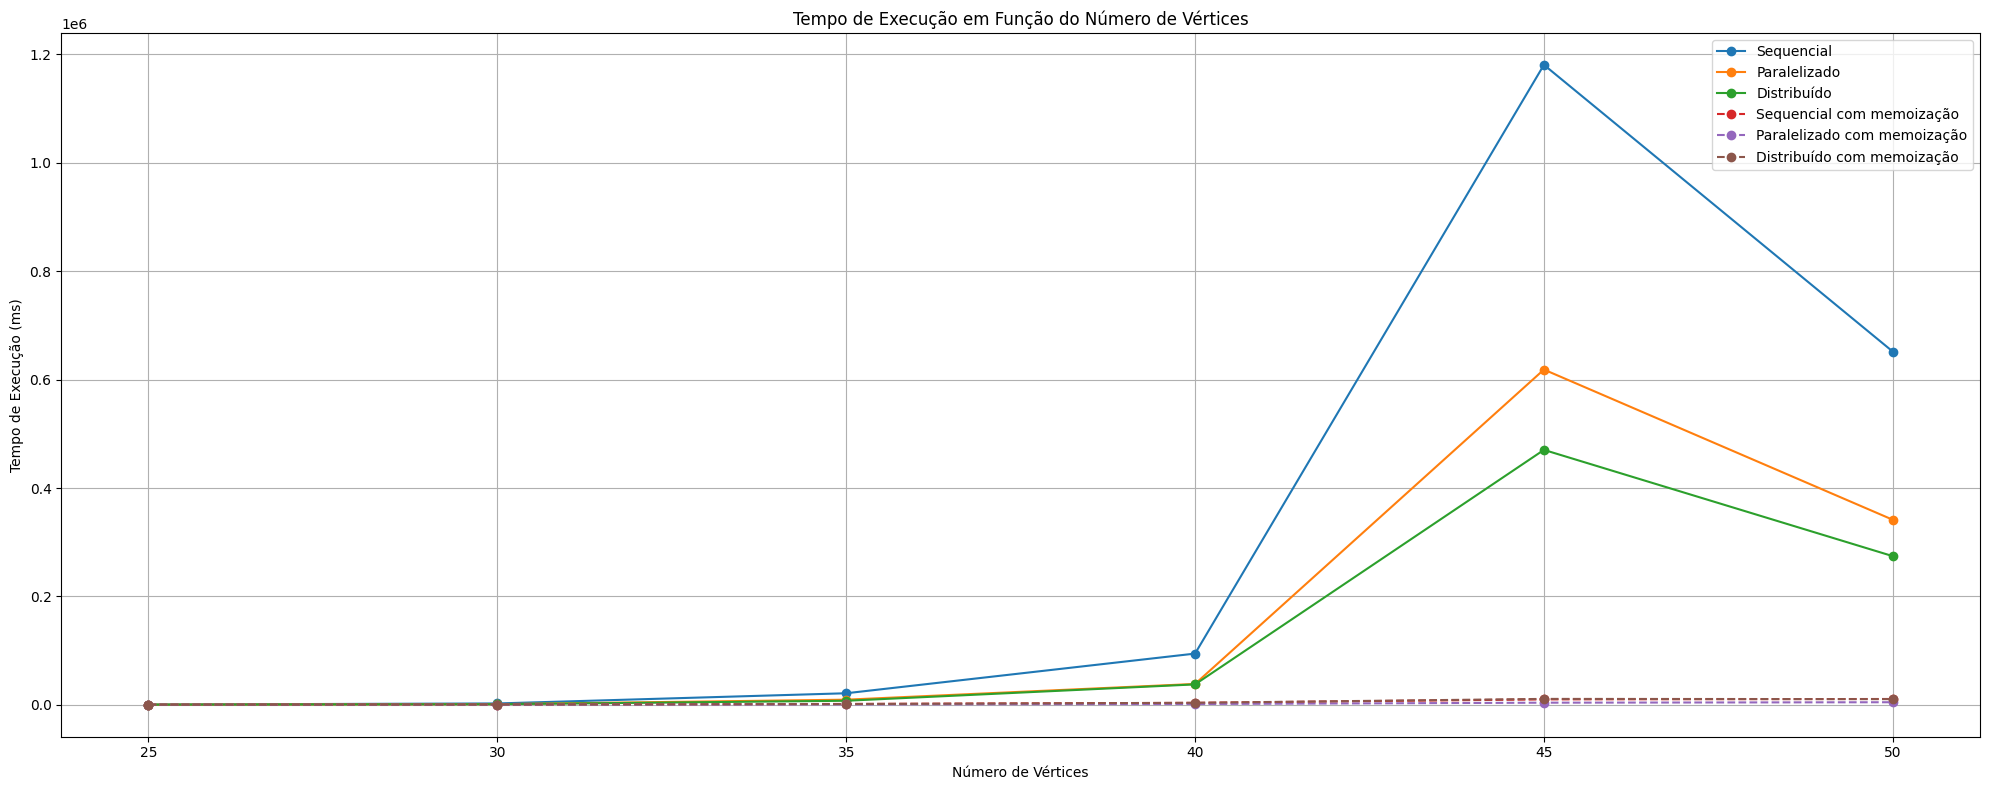

In [42]:
import matplotlib.pyplot as plt

# Número de vértices (eixo x)
n_vertices = [25, 30, 35, 40, 45, 50]

# Tempos de execução de cada algoritmo em ms
sequencial = [397, 2422, 21245, 94449, 1180895, 651750]
paralelizado = [160, 1148, 9389, 38442, 618543, 341409]
distribuido = [232, 1026, 7387, 37603, 470338, 274262]

sequencial_memo = [135, 446, 1520, 3521, 9934, 10677]
paralelizado_memo = [77, 189, 612, 1386, 3843, 4693]
distribuido_memo = [107, 392, 1327, 3622, 10839, 10434]


# Plotando as implementações
plt.figure(figsize=(20, 8))

plt.plot(n_vertices, sequencial, marker='o', label='Sequencial')
plt.plot(n_vertices, paralelizado, marker='o', label='Paralelizado')
plt.plot(n_vertices, distribuido, marker='o', label='Distribuído')

plt.plot(n_vertices, sequencial_memo, marker='o', linestyle='--', label='Sequencial com memoização')
plt.plot(n_vertices, paralelizado_memo, marker='o', linestyle='--', label='Paralelizado com memoização')
plt.plot(n_vertices, distribuido_memo, marker='o', linestyle='--', label='Distribuído com memoização')

plt.xlabel('Número de Vértices')
plt.ylabel('Tempo de Execução (ms)')
plt.title('Tempo de Execução em Função do Número de Vértices')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Podemos observar que para quantidade pequenas de vértices, o tempo de execução é parecido para todas as implementações e, conforme o número de vértices aumenta, as implementações com paralelização começam a ficar mais rápidas do que a implementação sequencial, respeitando a ordem:

    sequencial < paralela com threads < paralela com mpi e threads

Além disso, podemos ver que um número de vértices maior não significa necessariamente uma execução mais lenta, o que acontece com o grafo com vértices de 45 e 50. Isso é pela natureza aleatória de como os grafos estão sendo gerados, provavelmente o grafo de 45 possui uma quantidade de cliques maior ou uma quantidade maior de candidatos a serem analisados em cada clique.


Por fim, é evidente que o algoritmo com memoização é mais rápido do que o algoritmo puramente recursivo, não importando a paralelização. Isso evidencia o que foi constatado na primeira aula do curso, que, para a performance de uma solução, o algoritmo implementado é tão importante a paralelização.


Agora vamos dar uma olhada específica apenas nas implementações com memoização.


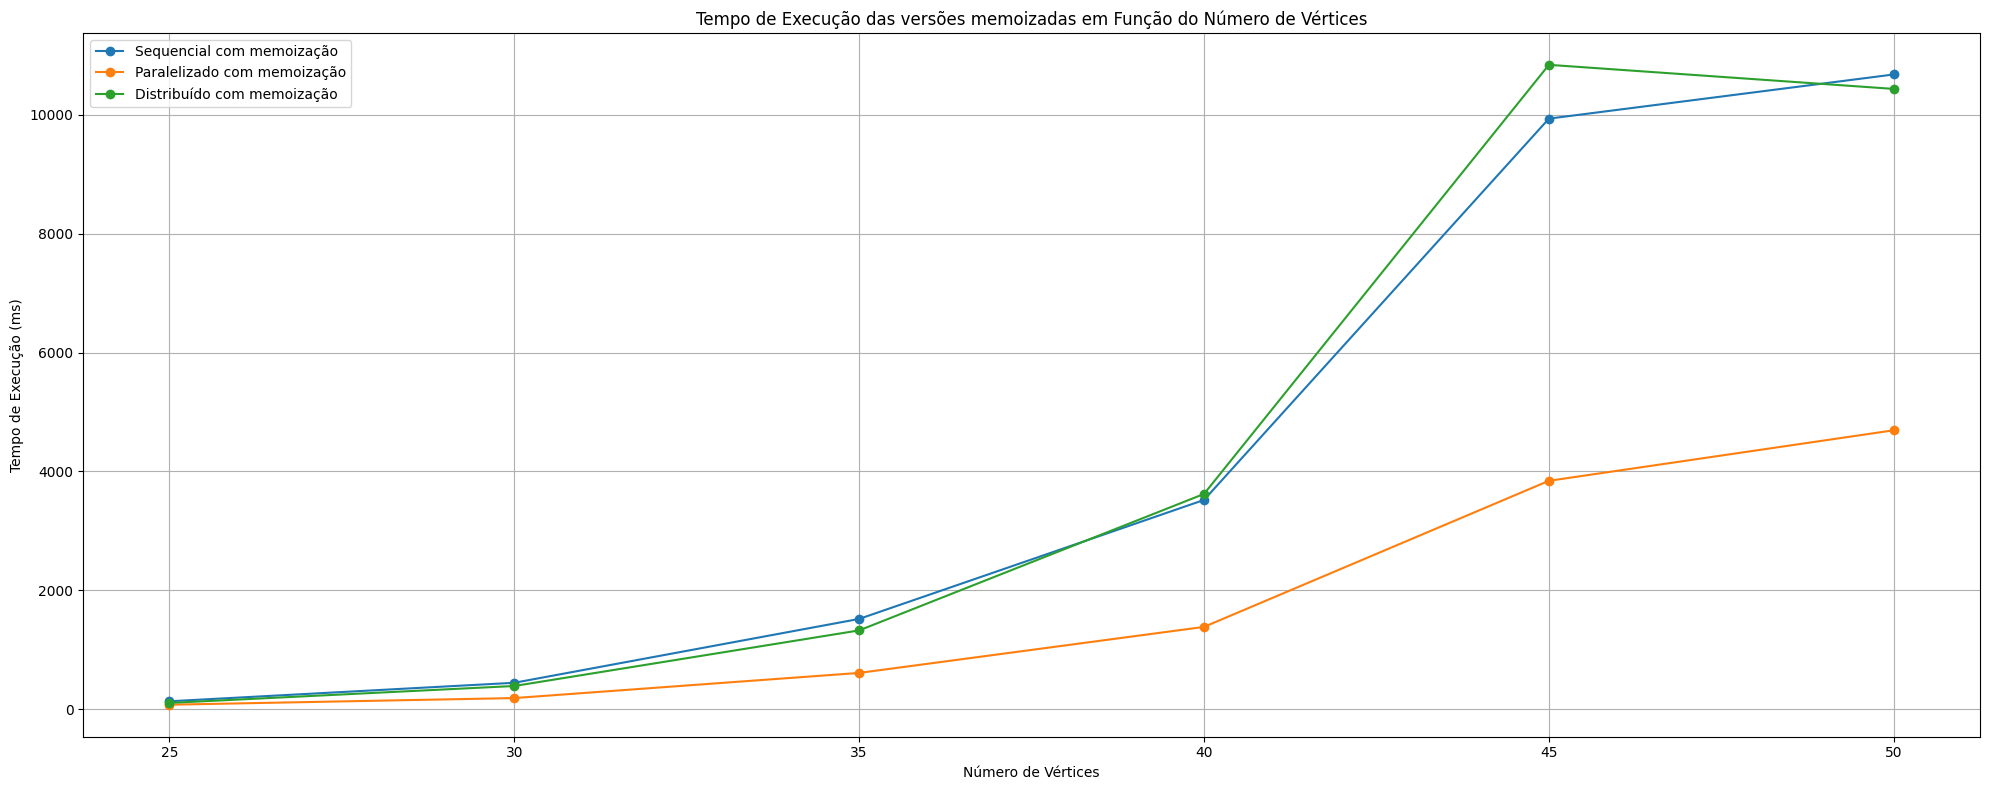

In [43]:
# Plotando as implementações
plt.figure(figsize=(20, 8))

plt.plot(n_vertices, sequencial_memo, marker='o', label='Sequencial com memoização')
plt.plot(n_vertices, paralelizado_memo, marker='o', label='Paralelizado com memoização')
plt.plot(n_vertices, distribuido_memo, marker='o', label='Distribuído com memoização')

plt.xlabel('Número de Vértices')
plt.ylabel('Tempo de Execução (ms)')
plt.title('Tempo de Execução das versões memoizadas em Função do Número de Vértices')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Analisando puramente a versão memoizada, percebemos que as implementações distribuídas e sequenciais possuem tempo de execução muito semelhante, enquanto a versão paralelizada apenas com OMP possui tempo de execução consistentemente menor.


Isso acontece pelo fato de o número de vértices não ser suficiente para a implementação distribuída valer a pena, já que o ***overhead*** que vem junto com o MPI (tempo de execução causado pela comunicação entre os processos), faz o ganho de paralelizar os cálculos entre processos diferentes não valer a pena. Contudo, a implementação com OMP possui uma comunicação entre threads mais otimizada do que a comunicação entre processos do MPI, já que uma é nativa do OMP enquanto a outra foi programada por mim. Isso faz com que a versão de OMP para esse número de vértices seja a melhor de todas.

### Topologias em MPI

As topologias em MPI também são fatores que devem ser levados em conta para a performance do algoritmo. Isso porque o mesmo algoritmo vai performar melhor ou pior dependendo da topologia do job. Para demonstrar essas diferenças, para a mesma implementação `forca-bruta-sequencial-distribuido.cpp`, vamos observar como as diferentes topologias influenciam no tempo de execução.

distribuido-2-tasks.slurm
```bash
#!/bin/bash
#SBATCH --ntasks=2
#SBATCH --cpus-per-task=4
#SBATCH --partition=normal
#SBATCH --job-name=distribuido-2-tasks-50-vertices

# Executa o código MPI
mpirun -np 2 ./forca-bruta-recursivo-distribuido
```

distribuido-8-tasks.slurm
```bash
#!/bin/bash
#SBATCH --ntasks=8
#SBATCH --cpus-per-task=1
#SBATCH --partition=normal
#SBATCH --job-name=distribuido-2-tasks-50-vertices

# Executa o código MPI
mpirun -np 8 ./forca-bruta-recursivo-distribuido
```

Além da topologia utilizada anteriormente:

distribuido.slurm
```bash
#!/bin/bash
#SBATCH --ntasks=4
#SBATCH --cpus-per-task=2
#SBATCH --partition=normal
#SBATCH --job-name=distribuido-50-vertices

# Executa o código MPI
mpirun -np 4 ./forca-bruta-recursivo-distribuido
```

Os arquivos de saída de cada job podem ser encontrados [aqui](https://github.com/Paulofalcao2002/projetoSuperComp/tree/main/simulacoes-cluster)

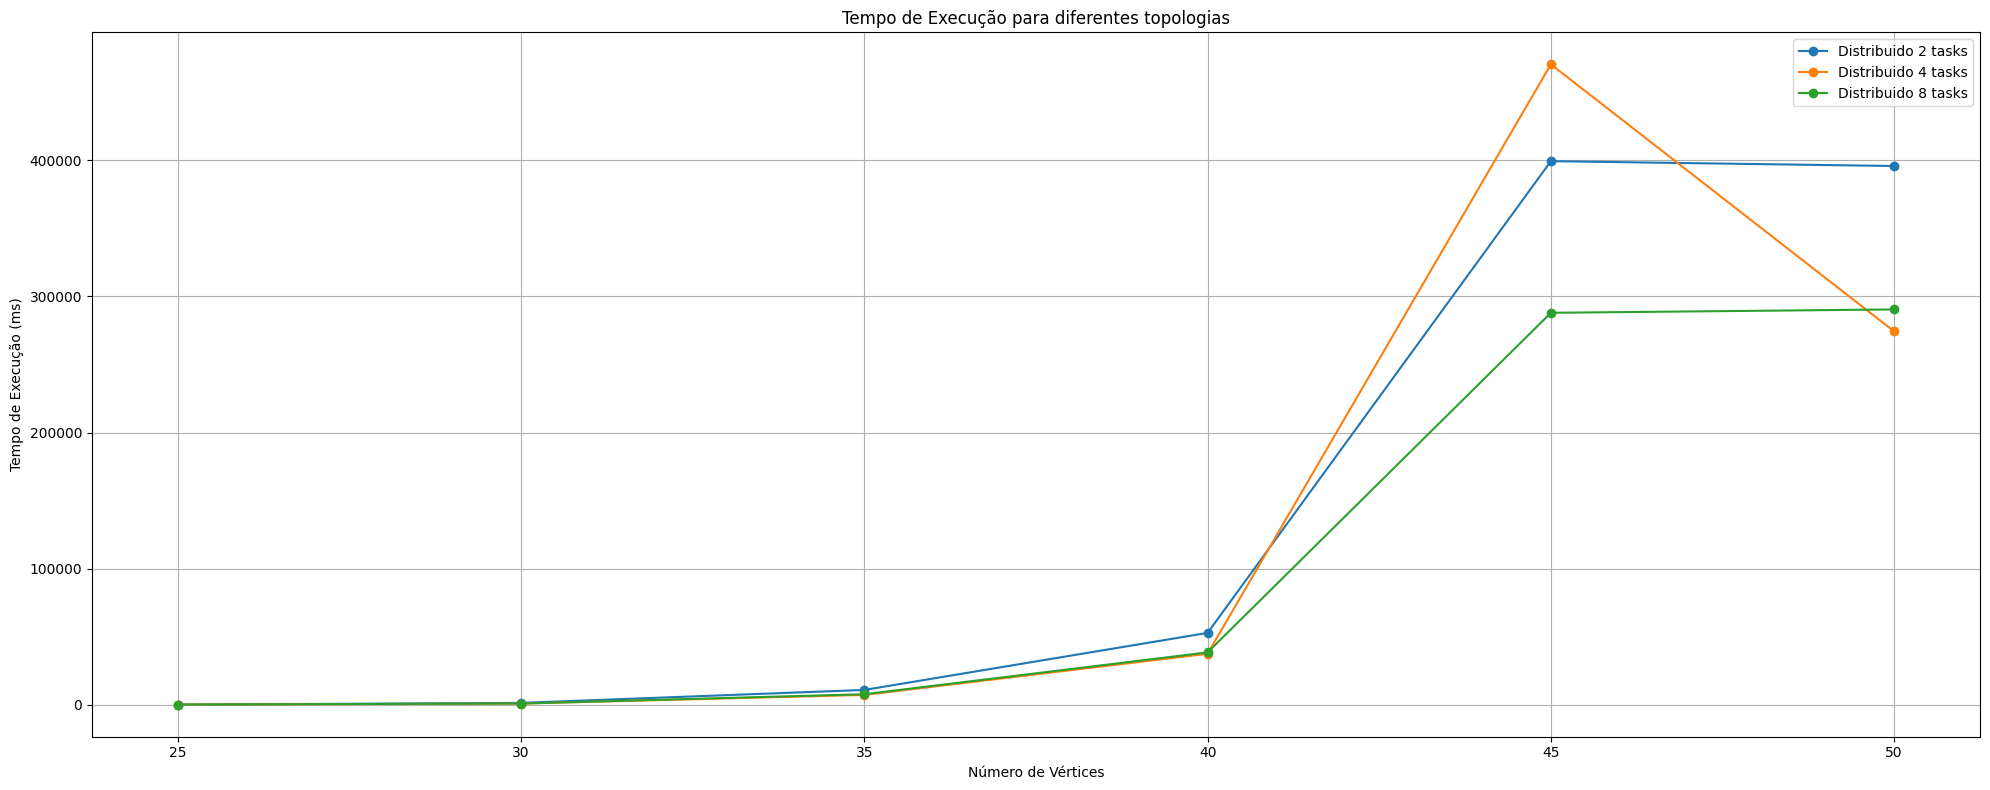

In [44]:
distribuido_2_tasks = [203, 1541, 11036, 52925, 399257, 395702]
distribuido_8_tasks = [341, 1049, 7897, 38613, 287931, 290394]

# Plotando as implementações
plt.figure(figsize=(20, 8))

plt.plot(n_vertices, distribuido_2_tasks, marker='o', label='Distribuido 2 tasks')
plt.plot(n_vertices, distribuido, marker='o', label='Distribuido 4 tasks')
plt.plot(n_vertices, distribuido_8_tasks, marker='o', label='Distribuido 8 tasks')


plt.xlabel('Número de Vértices')
plt.ylabel('Tempo de Execução (ms)')
plt.title('Tempo de Execução para diferentes topologias')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Podemos ver que o resultado não é sempre óbvio, ou seja, um maior número de processos não significa necessariamente que levará a um menor tempo de execução. Além disso, existem número de vértices que executam mais rápido para um processo com mais *tasks* e outros para um processo com menos *tasks*. Em geral, parece que a topologia com 4 processos performa melhor sempre (tirando o grafo de 45 vértices).


## Heurísticas
------

Uma maneira de obter soluções "razoáveis" em tempo de execução muito mais rápido é através de heurísticas, onde abrimos mão de encontrar a solução ótima para ganharmos em velocidade. A seguir estão duas heurísticas diferentes para resolver o problema da clique máxima em um grafo.

### Abordagem gulosa

Para encontrar a maior clique, essa abordagem explora uma das propriedades do problema de encontrar as cliques, o nível de adjacência de cada vértice. Dessa forma, ela busca a maior clique que envolve os vértices com maior nível de adjacência, ignorando os vértices que possuem adjacência baixa. Ela não irá necessariamente achar a maior clique justamente pois a maior clique pode não envolver os vértices com maior nível de adjacência.

In [45]:
%%writefile heuristica-adjacencia.cpp
#include <algorithm>
#include <chrono>
#include <fstream>
#include <iostream>
#include <vector>
using namespace std;
using namespace chrono;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> lerGrafo(const string &nomeArquivo, int &numVertices) {
  ifstream arquivo(nomeArquivo);
  int numArestas;
  arquivo >> numVertices >> numArestas;

  vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

  for (int i = 0; i < numArestas; ++i) {
    int u, v;
    arquivo >> u >> v;
    grafo[u - 1][v - 1] = 1;
    grafo[v - 1][u - 1] = 1; // O grafo é não direcionado
  }

  arquivo.close();

  return grafo;
}

// Função que retorna o candidato com maior adjacência
int encontraCandidatoSegundoHeuristica(const vector<vector<int>> &grafo,
                                     vector<int> &candidatos) {

  // Inicializa o número máximo de adjacências encontrado
  int maxAdjacencias = -1;
  // Inicializa o índice do candidato ideal
  int candidatoIdeal = -1;

  // Para todos os candidatos, busca o com maior adjacência
  for (int i = 0; i < (int) candidatos.size(); ++i) {
      int adjacencias = 0;
      for (int j = 0; j < (int) candidatos.size(); ++j) {
          // Se o candidato é adjacente a algum outro, incrementa seu nível de adjacência
          if (grafo[candidatos[i]][candidatos[j]] == 1) {
              adjacencias++;
          }
      }

      // Verifica se o número de adjacências é maior que o máximo encontrado até agora
      if (adjacencias > maxAdjacencias) {
          maxAdjacencias = adjacencias;
          candidatoIdeal = i;
      }
  }

  // Retorna o índice do candidato com mais adjacências
  return candidatoIdeal;
}

// Função recursiva para encontrar a clique máxima
vector<int> encontrarCliqueMaximaHeuristica(const vector<vector<int>> &grafo,
                                     vector<int> candidatos) {

  // Cria clique máxima
  vector<int> cliqueMaxima;

  // Enquanto ainda existirem candidatos
  while (candidatos.size() > 0) {
    // Usa a função da heurística para achar o candidato ideal
    int indiceCandidatoComMaiorAdjacencia = encontraCandidatoSegundoHeuristica(grafo, candidatos);
    int candidato = candidatos[indiceCandidatoComMaiorAdjacencia];

    // Apaga o candidato atual do vetor de candidatos
    candidatos.erase(candidatos.begin() + indiceCandidatoComMaiorAdjacencia);

    // Adiciona candidato a clique máxima
    cliqueMaxima.push_back(candidato);

    // Vamos construir um novo vetor de candidatos
    vector<int> novosCandidatos;
    for (auto candidatoAtual: candidatos) {
      bool adjacenteACliqueMaxima = true;

      for (auto membroClique: cliqueMaxima) {
        if (grafo[candidatoAtual][membroClique] == 0) {
          adjacenteACliqueMaxima = false;
          break;
        }
      }

      if (adjacenteACliqueMaxima) {
        novosCandidatos.push_back(candidatoAtual);
      }
    }

    // Atualiza os candidatos de acordo com os novos candidatos
    candidatos = novosCandidatos;
  }

  // Retorna clique máxima
  return cliqueMaxima;
}

// Função principal para encontrar a clique máxima
vector<int> encontrarCliqueMaxima(const vector<vector<int>> &grafo,
                                  int numVertices) {
  // Inicializa vetor pra maior clique e primeiro vetor de candidatos
  vector<int> melhorClique;
  vector<int> candidatos;

  // Preenche o primeiro vetor de candidatos, inicialmente todos os vértices são candidatos
  for (int i = 0; i < numVertices; i++) {
    candidatos.push_back(i);
  }

  melhorClique = encontrarCliqueMaximaHeuristica(grafo, candidatos);

  // Retorna a maior clique
  return melhorClique;
}

int main() {
  // Lê grafo
  int numVertices;
  vector<vector<int>> grafo = lerGrafo("grafo.txt", numVertices);

  // Mede tempo inicial
  auto start = high_resolution_clock::now();

  // Executa a função de achar maior clique
  vector<int> cliqueMaxima = encontrarCliqueMaxima(grafo, numVertices);

  // Retém o tempo final
  auto stop = high_resolution_clock::now();
  auto duration = duration_cast<milliseconds>(stop - start);

  // Mostra o tempo final
  cout << "Execution time: " << duration.count() << " milliseconds" << endl;

  // Mostra qual é a clique máxima encontrada
  cout << "Clique máxima: ";
  for (auto vertice : cliqueMaxima) {
    cout << vertice + 1 << " ";
  }
  cout << endl;
  cout << "Tamanho clique máxima: " << cliqueMaxima.size() << endl;

  return 0;
}



Overwriting heuristica-adjacencia.cpp


In [46]:
%%shell
g++ -Wall -O3 -o heuristica-adjacencia heuristica-adjacencia.cpp
./heuristica-adjacencia

Execution time: 0 milliseconds
Clique máxima: 4 6 9 26 29 7 13 
Tamanho clique máxima: 7


Podemos ver que a clique máxima não foi encontrada (pode mudar dependendo do grafo), porém em uma velocidade enorme foi retornada uma clique que possui um vértice a menos do que a máxima. Essa é a vantagem de utilizar algoritmos com heurísticas.

### Abordagem gulosa + randomização


Um problema da nossa abordagem é que ela foca completamente em explorar a propriedade da adjacência do problema. Isso faz com que o universo de soluções possíveis não seja explorado por completo. Dessa forma, ao adicionar uma chance randômica de selecionar um candidato aleatório, por exemplo, estaremos dando a chance de nosso resultado ser melhor do que a abordagem anterior, pelo algortimo estar explorando um universo maior de candidatos. Esse é o conceito de **exploration x exploitation** visto em aula.


Para implementar isso, na função que escolhe o candidato segundo a heurística, existe uma chance de 25% de ela escolher um candidato aleatório.

In [47]:
%%writefile heuristica-adjacencia-randomica.cpp
#include <algorithm>
#include <chrono>
#include <fstream>
#include <iostream>
#include <vector>
#include <random>
using namespace std;
using namespace chrono;

// Função para ler o grafo a partir do arquivo de entrada
vector<vector<int>> lerGrafo(const string &nomeArquivo, int &numVertices) {
  ifstream arquivo(nomeArquivo);
  int numArestas;
  arquivo >> numVertices >> numArestas;

  vector<vector<int>> grafo(numVertices, vector<int>(numVertices, 0));

  for (int i = 0; i < numArestas; ++i) {
    int u, v;
    arquivo >> u >> v;
    grafo[u - 1][v - 1] = 1;
    grafo[v - 1][u - 1] = 1; // O grafo é não direcionado
  }

  arquivo.close();

  return grafo;
}

// Função que retorna o candidato com maior adjacência
int encontraCandidatoSegundoHeuristica(const vector<vector<int>> &grafo,
                                     vector<int> &candidatos,
                                     mt19937 &gen) {

  // Inicializa o número máximo de adjacências encontrado
  int maxAdjacencias = -1;
  // Inicializa o índice do candidato ideal
  int candidatoIdeal = -1;

  // Inicializa a chance de escolha aleatória como false
  bool escolhaAleatoria = false;

  // Gera um número aleatório entre 0 e 3 (25% de chance)
  uniform_int_distribution<> dis(0, 3);
  int randNum = dis(gen);

  if (randNum == 0) {
      escolhaAleatoria = true;
  }

  // Se a escolha for aleatória
  if (escolhaAleatoria) {
      uniform_int_distribution<> disCandidates(0, candidatos.size() - 1);
      candidatoIdeal = disCandidates(gen);
      return candidatoIdeal;
  }

  // Para todos os candidatos, busca o com maior adjacência
  for (int i = 0; i < (int) candidatos.size(); ++i) {
      int adjacencias = 0;
      for (int j = 0; j < (int) candidatos.size(); ++j) {
          // Se o candidato é adjacente a algum outro, incrementa seu nível de adjacência
          if (grafo[candidatos[i]][candidatos[j]] == 1) {
              adjacencias++;
          }
      }

      // Verifica se o número de adjacências é maior que o máximo encontrado até agora
      if (adjacencias > maxAdjacencias) {
          maxAdjacencias = adjacencias;
          candidatoIdeal = i;
      }
  }

  // Retorna o índice do candidato com mais adjacências
  return candidatoIdeal;
}

// Função recursiva para encontrar a clique máxima
vector<int> encontrarCliqueMaximaHeuristica(const vector<vector<int>> &grafo,
                                     vector<int> candidatos) {

  // Cria clique máxima
  vector<int> cliqueMaxima;

  // Cria um gerador de número aleatório
  random_device rd;
  mt19937 gen(rd());

  // Enquanto ainda existirem candidatos
  while (candidatos.size() > 0) {
    // Usa a função da heurística para achar o candidato ideal
    int indiceCandidatoComMaiorAdjacencia = encontraCandidatoSegundoHeuristica(grafo, candidatos, gen);
    int candidato = candidatos[indiceCandidatoComMaiorAdjacencia];

    // Apaga o candidato atual do vetor de candidatos
    candidatos.erase(candidatos.begin() + indiceCandidatoComMaiorAdjacencia);

    // Adiciona candidato a clique máxima
    cliqueMaxima.push_back(candidato);

    // Vamos construir um novo vetor de candidatos
    vector<int> novosCandidatos;
    for (auto candidatoAtual: candidatos) {
      bool adjacenteACliqueMaxima = true;

      for (auto membroClique: cliqueMaxima) {
        if (grafo[candidatoAtual][membroClique] == 0) {
          adjacenteACliqueMaxima = false;
          break;
        }
      }

      if (adjacenteACliqueMaxima) {
        novosCandidatos.push_back(candidatoAtual);
      }
    }

    // Atualiza os candidatos de acordo com os novos candidatos
    candidatos = novosCandidatos;
  }

  // Retorna clique máxima
  return cliqueMaxima;
}

// Função principal para encontrar a clique máxima
vector<int> encontrarCliqueMaxima(const vector<vector<int>> &grafo,
                                  int numVertices) {
  // Inicializa vetor pra maior clique e primeiro vetor de candidatos
  vector<int> melhorClique;
  vector<int> candidatos;

  // Preenche o primeiro vetor de candidatos, inicialmente todos os vértices são candidatos
  for (int i = 0; i < numVertices; i++) {
    candidatos.push_back(i);
  }

  melhorClique = encontrarCliqueMaximaHeuristica(grafo, candidatos);

  // Retorna a maior clique
  return melhorClique;
}

int main() {
  // Lê grafo
  int numVertices;
  vector<vector<int>> grafo = lerGrafo("grafo.txt", numVertices);

  // Mede tempo inicial
  auto start = high_resolution_clock::now();

  // Executa a função de achar maior clique
  vector<int> cliqueMaxima = encontrarCliqueMaxima(grafo, numVertices);

  // Retém o tempo final
  auto stop = high_resolution_clock::now();
  auto duration = duration_cast<milliseconds>(stop - start);

  // Mostra o tempo final
  cout << "Execution time: " << duration.count() << " milliseconds" << endl;

  // Mostra qual é a clique máxima encontrada
  cout << "Clique máxima: ";
  for (auto vertice : cliqueMaxima) {
    cout << vertice + 1 << " ";
  }
  cout << endl;
  cout << "Tamanho clique máxima: " << cliqueMaxima.size() << endl;

  return 0;
}



Overwriting heuristica-adjacencia-randomica.cpp


In [48]:
%%shell
g++ -Wall -O3 -o heuristica-adjacencia-randomica heuristica-adjacencia-randomica.cpp
./heuristica-adjacencia-randomica

Execution time: 0 milliseconds
Clique máxima: 7 29 6 24 4 9 26 
Tamanho clique máxima: 7


Para comparar o resultado das duas, vamos rodar o executável da solução com randomização várias vezes e computar quantas vezes essa solução é superior a solução que usa da **exploitation** puramente.

In [49]:
# Gera um grafo maior para termos um espaço de soluções maior
gera_grafo(150)

# Acha a clique máxima
acha_clique_maxima()

Grafo densamente conectado gerado e salvo em 'grafo.txt'.
Clique máxima encontrada: ['145', '143', '138', '119', '117', '104', '101', '98', '93', '87', '54', '52', '48', '18', '10', '5']
Tamanho 16


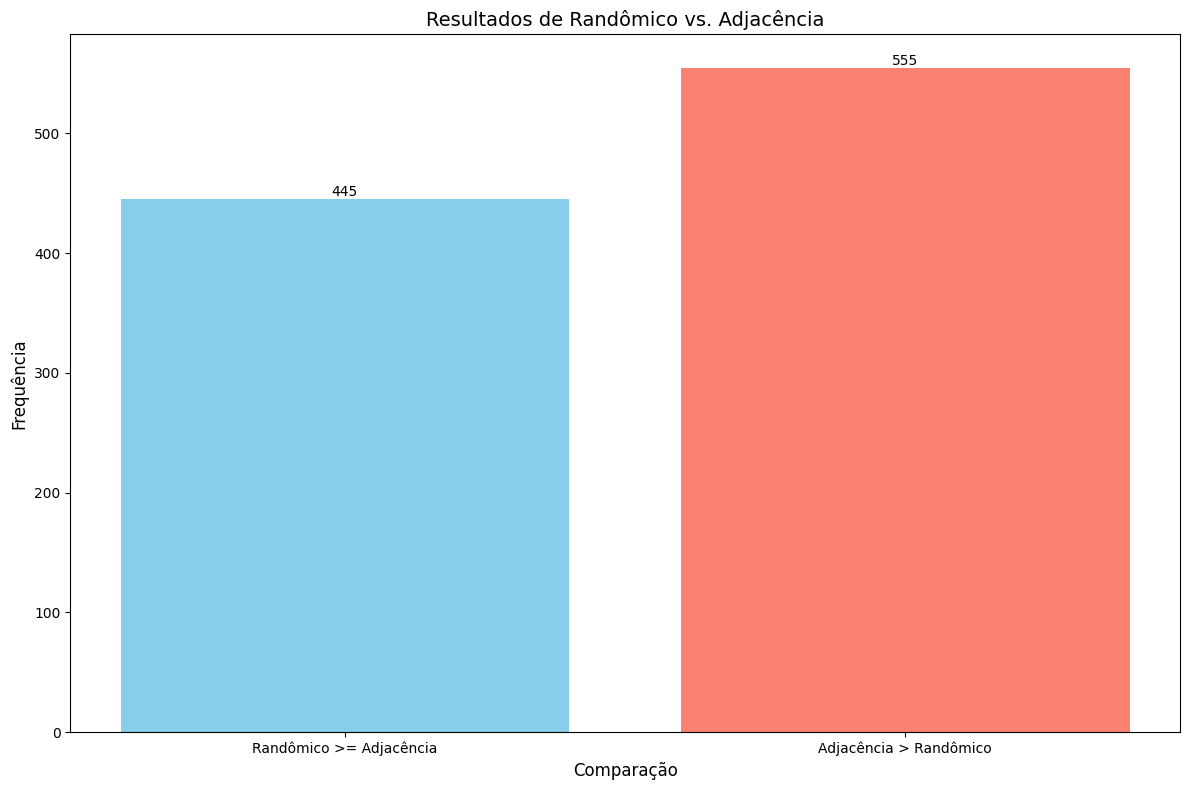

In [50]:
import subprocess
import matplotlib.pyplot as plt

# Nomes dos executáveis
executavel_adjacencia = './heuristica-adjacencia'
executavel_randomico = './heuristica-adjacencia-randomica'

# Lista para armazenar os resultados
resultados = []

# Rodar o executável adjacencia uma vez para obter o valor de referência
proc_adjacencia = subprocess.run([executavel_adjacencia], text=True, capture_output=True)
resultado_adjacencia = int(proc_adjacencia.stdout.strip().split()[-1])

# Rodar o executável randômico 1000 vezes
for _ in range(1000):
    proc_randomico = subprocess.run([executavel_randomico], text=True, capture_output=True)
    resultado_randomico = int(proc_randomico.stdout.strip().split()[-1])
    resultados.append(resultado_randomico >= resultado_adjacencia)

# Contar quantas vezes o resultado_adjacencia foi maior que o resultado_randomico
contagem = sum(resultados)

# Configurações visuais do gráfico
plt.figure(figsize=(12, 8))
bar_colors = ['skyblue', 'salmon']
plt.bar(['Randômico >= Adjacência', 'Adjacência > Randômico'], [contagem, 1000 - contagem], color=bar_colors)
plt.xlabel('Comparação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Resultados de Randômico vs. Adjacência', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar valor numérico acima das barras
for i, v in enumerate([contagem, 1000 - contagem]):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Pelo gráfico acima, podemos ver que utilizar a abordagem randômica está compensando em torno de 40% das vezes. Além disso, caso se deseje chegar mais próximo da solução verdadeira possível é preciso utilizar a abordagem randômica, justificando ela como uma implementação mais completa que a utiliza puramente ***exploitation***. Caso desejássemos uma heurística ainda melhor, que combina tanto ***exploitation*** e ***exploration***, poderíamos utilizar um algoritmo genético, por exemplo.


## Conclusão


Em conclusão, o problema de encontrar a clique máxima em um grafo é um dos problemas mais difíceis que existem em termos computacionais. Durante o estudo foram feitas diversas soluções que buscavam encontrar a solução ótima, com tentativas de otimização utilizando tecnologias com OMP e MPI. Além disso, ao final foram apresentadas soluções alternativas, que utilizam heurśiticas para encontrar uma solução "razoável" para o problema em tempo muito mais rápido do que as soluções exaustivas.


Os resultados demonstram que não existe solução perfeita, porém analisando o contexto do problema que exige a busca por cliques máximos em um grafo, é possível escolher qual a melhor solução que se encaixa ao contexto. Além disso, a paralelização nem sempre significa melhor performance de um algoritmo. Uma solução que é muito rápida sequencialmente, talvez não se beneficie de paralelização para uma quantidade pequena de vértices. No entanto, à medida que a solução sequencial se torna lenta em grafos maiores, é esperado que a solução paralela sempre passe a ser mais rápida.


Por fim, a maneira como a paralelização é feita também importa. Não basta paralelismos todos as tarefas que podem ser paralelizadas, já que existe o **overhead** causado pelas tecnologias envolvidas, o que pode fazer com que a solução paralela perca eficiência. Também é necessário analisar detalhes como topologia dos processos, como demonstrado com os resultados para diferentes topologias.